In [1]:
#Importing of libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
%matplotlib inline

In [10]:
Airbnb = pd.read_csv("Airbnb Dataset 19.csv")
# Print header of the dataframe
Airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,6/22/2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,10/5/2017,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,6/24/2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,7/21/2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,6/9/2019,1.33,4,188


In [4]:
#Print data types of Data Frame
Airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Here price need to be converted to float and last_review need to be converted to datetime(Problem 1,2)

In [5]:
# Print info of data frame
Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              249 non-null    int64  
 1   name                            249 non-null    object 
 2   host_id                         249 non-null    int64  
 3   host_name                       249 non-null    object 
 4   neighbourhood_group             249 non-null    object 
 5   neighbourhood                   249 non-null    object 
 6   latitude                        249 non-null    float64
 7   longitude                       249 non-null    float64
 8   room_type                       249 non-null    object 
 9   price                           249 non-null    int64  
 10  minimum_nights                  249 non-null    int64  
 11  number_of_reviews               249 non-null    int64  
 12  last_review                     242 

There is missing data in last_review and reviews_per_month

In [6]:
#Print number of missing values
Airbnb.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       7
reviews_per_month                 7
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [8]:
Airbnb.shape[0]

249

In [19]:
#filling null value and droping the column of reviews_per_month

Airbnb.fillna({'reviews_per_month':0}, inplace = True)
Airbnb.reviews_per_month.isnull().sum()

0

In [22]:
#Dropping unwanted column
Airbnb.drop(['id','last_review'], axis = 1, inplace = True)
Airbnb.head(3)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0.00,1,365


In [23]:
Airbnb.isna().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [24]:
#Print describtion of data frame
Airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.490000e+02,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,1.499884e+05,40.730257,-73.964044,143.971888,8.718876,103.445783,1.060964,1.738956,198.538153
std,4.010393e+05,0.049660,0.029685,91.442975,20.398680,100.337887,1.002393,1.234635,126.048056
min,2.787000e+03,40.631880,-74.080880,35.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,5.014800e+04,40.688430,-73.984980,85.000000,2.000000,21.000000,0.260000,1.000000,75.000000
50%,9.779700e+04,40.721620,-73.964280,125.000000,3.000000,73.000000,0.770000,1.000000,225.000000
75%,1.936370e+05,40.761930,-73.948220,175.000000,5.000000,166.000000,1.650000,2.000000,310.000000
max,6.197784e+06,40.867540,-73.765970,800.000000,200.000000,467.000000,4.720000,6.000000,365.000000


In [26]:
#Again checking info
Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            249 non-null    object 
 1   host_id                         249 non-null    int64  
 2   host_name                       249 non-null    object 
 3   neighbourhood_group             249 non-null    object 
 4   neighbourhood                   249 non-null    object 
 5   latitude                        249 non-null    float64
 6   longitude                       249 non-null    float64
 7   room_type                       249 non-null    object 
 8   price                           249 non-null    float64
 9   minimum_nights                  249 non-null    int64  
 10  number_of_reviews               249 non-null    int64  
 11  reviews_per_month               249 non-null    float64
 12  calculated_host_listings_count  249 

# Visualize relationship between price and room_type

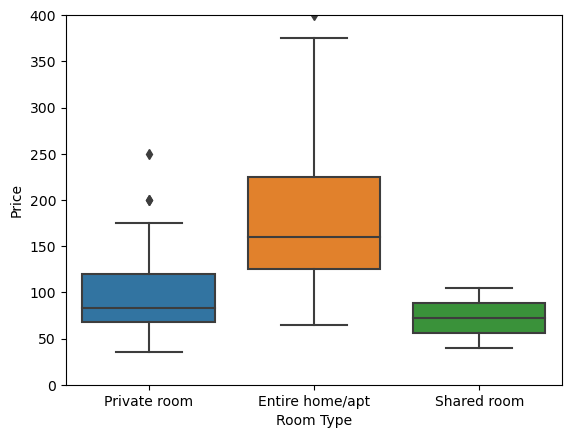

In [28]:
sns.boxplot(x = 'room_type', y = 'price', data = Airbnb)
plt.ylim(0,400)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='neighbourhood_group', ylabel='count'>

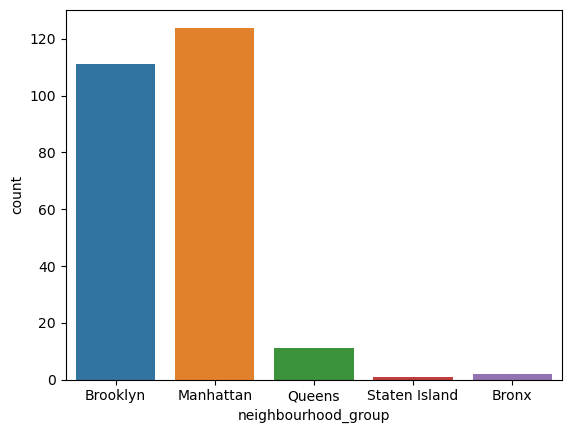

In [29]:
sns.countplot(x="neighbourhood_group", data = Airbnb)

From the graph we infer that Manhattan has the maximum number of airbnbs.

<Axes: xlabel='room_type', ylabel='count'>

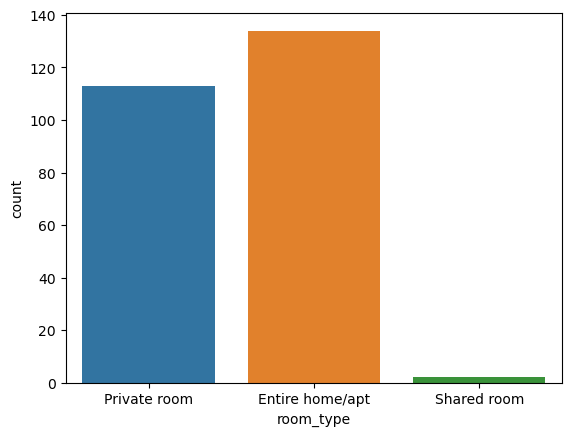

In [30]:
sns.countplot(x="room_type", data = Airbnb)

From the graph we infer that the maximum number of airbnbs are that of entire room type.

<Axes: xlabel='neighbourhood_group'>

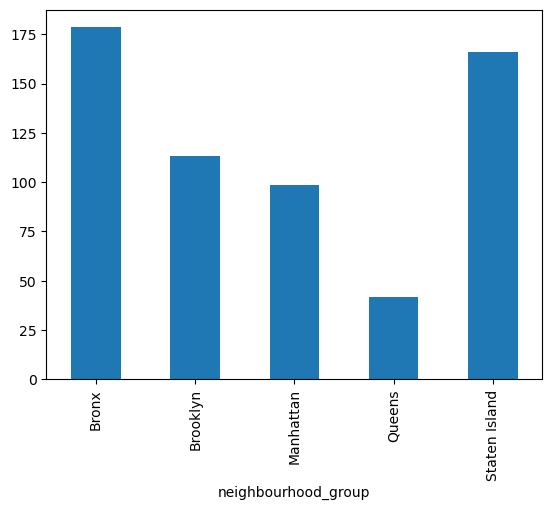

In [35]:
numbrev = Airbnb.groupby('neighbourhood_group')['number_of_reviews'].mean()
numbrev.plot(kind='bar')

<Axes: xlabel='neighbourhood_group'>

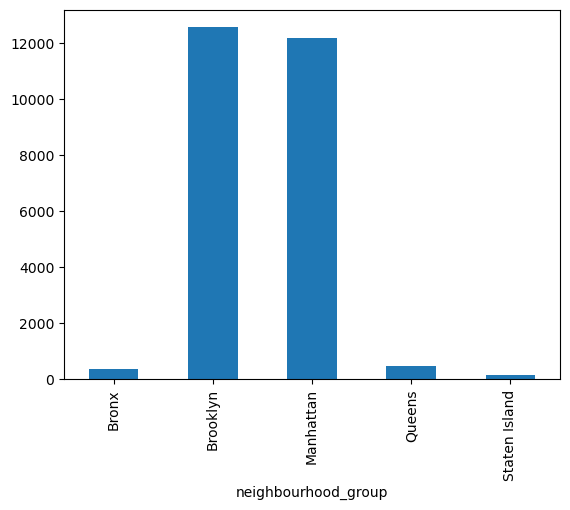

In [36]:
numbrev = Airbnb.groupby('neighbourhood_group')['number_of_reviews'].sum()
numbrev.plot(kind='bar')

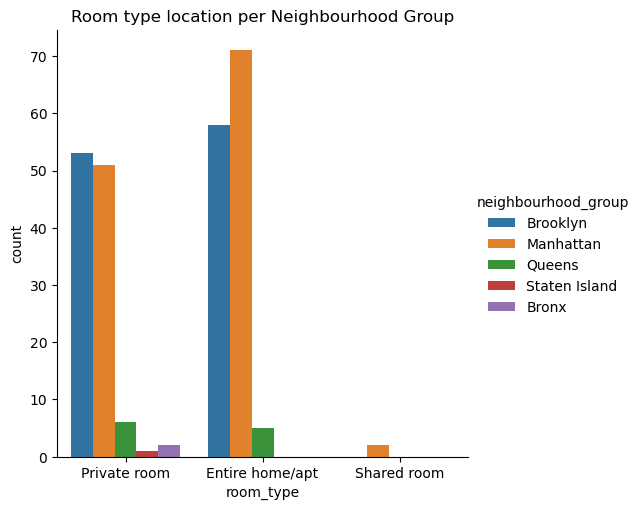

In [37]:
title = 'Room type location per Neighbourhood Group'
sns.catplot(x ='room_type', kind="count", hue="neighbourhood_group", data = Airbnb);
plt.title(title)
plt.ioff()

From the graph we can conclude that although the number of airbnb in Manhattan is more, the number of private room in Brooklyn is more than in manhattan. Also the total number of shared rooms are comparatively very less than any other type.

# 2nd Dataset reviews

In [38]:
HRDataset = pd.read_csv("HRDataset_v14.csv")
# Print header of the dataframe
HRDataset.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,...,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,...,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


In [39]:
#Print data types of Data Frame
HRDataset.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [55]:
# Print info of data frame
HRDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [42]:
#Print number of missing values
HRDataset.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [72]:
HRDataset['EmploymentStatus'].unique()

array(['Active', 'Voluntarily Terminated', 'Terminated for Cause'],
      dtype=object)

In [57]:
#Dropping unwanted column
HRDataset.drop(['EmpID','DateofTermination','RaceDesc','DaysLateLast30','PositionID','GenderID','ManagerID','PositionID','MaritalStatusID','MarriedID','Zip','HispanicLatino'], axis = 1, inplace = True)
HRDataset.head(3)

,Employee_Name,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,Position,State,DOB,...,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,Absences
0,"Adinolfi, Wilson K",1,5,4,0,62506,0,Production Technician I,MA,07/10/83,...,Active,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,0,1/17/2019,1
1,"Ait Sidi, Karthikeyan",5,3,3,0,104437,1,Sr. DBA,MA,05/05/75,...,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,Fully Meets,4.96,3,6,2/24/2016,17
2,"Akinkuolie, Sarah",5,5,3,0,64955,1,Production Technician II,MA,09/19/88,...,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,3


In [58]:
HRDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpStatusID                 311 non-null    int64  
 2   DeptID                      311 non-null    int64  
 3   PerfScoreID                 311 non-null    int64  
 4   FromDiversityJobFairID      311 non-null    int64  
 5   Salary                      311 non-null    int64  
 6   Termd                       311 non-null    int64  
 7   Position                    311 non-null    object 
 8   State                       311 non-null    object 
 9   DOB                         311 non-null    object 
 10  Sex                         311 non-null    object 
 11  MaritalDesc                 311 non-null    object 
 12  CitizenDesc                 311 non-null    object 
 13  DateofHire                  311 non

In [60]:
#Print describtion of data frame
HRDataset.describe()

,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,4.110000,3.890675,1.218650,10.237942
std,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,0.789938,0.909241,2.349421,5.852596
min,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.120000,1.000000,0.000000,1.000000
25%,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,3.690000,3.000000,0.000000,5.000000
50%,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,4.280000,4.000000,0.000000,10.000000
75%,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,4.700000,5.000000,0.000000,15.000000
max,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,5.000000,5.000000,8.000000,20.000000


# Data Visualization of HR dataset

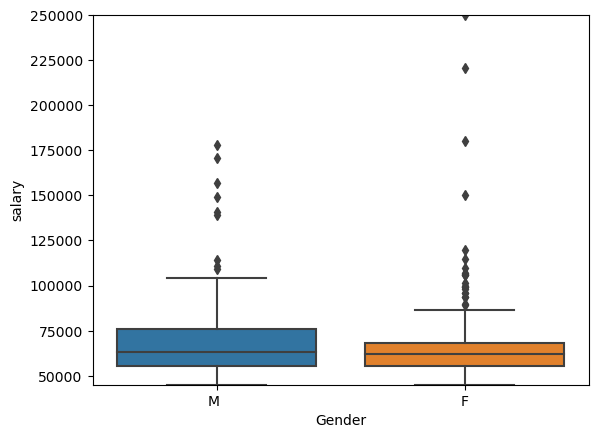

In [65]:
sns.boxplot(x = 'Sex', y = 'Salary', data = HRDataset)
plt.ylim(45000,250000)
plt.xlabel('Gender')
plt.ylabel('salary')
plt.show()

We can find from the graph that overall Salary of Males is more than Females, but there are some Females at the top Salaried we can find in outliers.

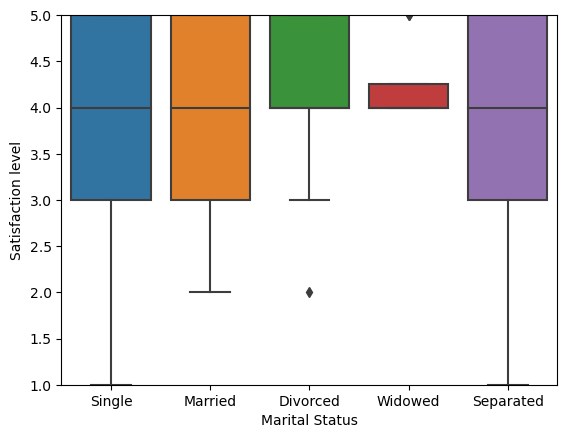

In [66]:
sns.boxplot(x = 'MaritalDesc', y = 'EmpSatisfaction', data = HRDataset)
plt.ylim(1,5)
plt.xlabel('Marital Status')
plt.ylabel('Satisfaction level')
plt.show()

We can conclude from the graph that Single, Married and Separated people are more Satisfied in th Job compared to DIvorced and Widowed.

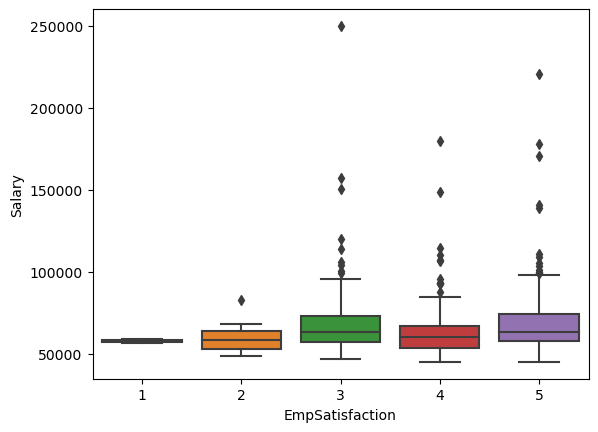

In [70]:
sns.boxplot(x = 'EmpSatisfaction', y = 'Salary', data = HRDataset)
plt.xlabel('EmpSatisfaction')
plt.ylabel('Salary')
plt.show()

Here we can conclude that employees with satisfaction level 3 and 5 are having almost same salary.

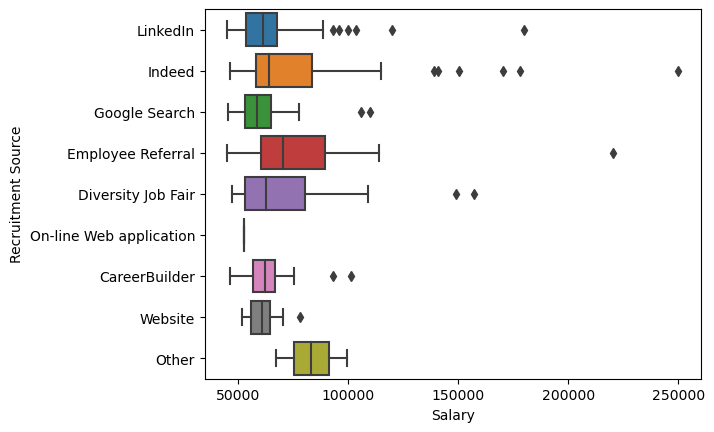

In [84]:
sns.boxplot(x = 'Salary', y = 'RecruitmentSource', data = HRDataset)
plt.xlabel('Salary')
plt.ylabel('Recruitment Source')
plt.show()

We can conclude from the graph that people joining from Indeed,Employee Referral and Diversity Job fair sources are having better salaries. Recruitments through online web application pays very less salary.